# Machine Learning I, Programming Exercise 3

## 1. Gradient Descent
*Gradient Descent* is an iterative method to find a local minimum of a function $f: \mathbb{R}^{d} \to \mathbb{R}$. The algorithm starts with an arbitrary estimate $\mathbf{x}^{(0)} \in \mathbb{R}^{d}$ and produces a sequence of estimates $\mathbf{x}^{(1)}, \mathbf{x}^{(2)}, \ldots$ according to the following update rule:
\begin{equation*}
    \mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} - \alpha_t \nabla f(\mathbf{x}^{(t)}),
\end{equation*}
where $\alpha_t \in \mathbb{R}_{+}$ is called the *step size* (note that it is allowed to change in every iteration). Since the gradient of $f$ points in the direction of steepest ascent, subtracting the gradient updates the estimate towards the direction of steepest descent. The algorithm terminates when $\lVert \nabla f(\mathbf{x}^{(t)}) \rVert < \varepsilon$ for some small $\varepsilon > 0$, i.e., when it (approximately) reaches a critical point of $f$. Note that convergence is not guaranteed in the general case, so it makes sense to enforce a hard limit on the number of iterations.

In this exercise we are going to perform gradient descent on Himmelblau's function, a polynomial of degree four in two variables:
\begin{align}
    f: && \mathbb{R}^{2} &\to \mathbb{R}\\
    &&\left(\begin{matrix}x \\ y\end{matrix}\right) &\mapsto (x^2 + y - 11)^2 + (x + y^2 - 7)^2
\end{align}
Specifically, your tasks are as follows:
1. Implement the gradient descent method on Himmelblau's function. Your routine should return the whole list of iterates $\mathbf{x}^{(0)}, \mathbf{x}^{(1)}, \ldots$, so that you can also visualize the trajectory. The code skeleton already plots Himmelblau's function, so you can use the [`plot`](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#line-plots) method of Matplotlib's `Axes3D` object to draw the trajectory into the same figure. Choose $\mathbf{x}^{(0)}$ uniformly random from the square spanned by the two points $(\begin{matrix}-6 & -6\end{matrix})^T$ and $(\begin{matrix}6 & 6\end{matrix})^T$ and run the algorithm for several draws of $\mathbf{x}^{(0)}$.
2. Play around with the step size and visualize the result to see what happens.
3. Another popular method for finding local optima is called *Newton's Method*. It works exactly in the same way as gradient descent, except that the step size in the update formula is replaced by the inverse of the hessian matrix of $f$:
\begin{equation*}
    \mathbf{x}^{(t+1)} = \mathbf{x}^{(t)} - H_f(\mathbf{x}^{(t)})^{-1} \nabla f(\mathbf{x}^{(t)})
\end{equation*}
Implement Newton's method in the same way as you did for gradient descent including the visualization and run the cell for a few times to see what happens.
4. Compare the two methods. What differences did you notice regarding, for example, the number of iterations till convergence, the trajectories, etc.?
5. You have probably noticed by now that our simple version of Newton's method often ends up in saddle points or even the local maximum. One way of mitigating this is to perform the update step only if the hessian matrix $H_f(\mathbf{x}^{(t)})$ is positive definite and to fall back to a simple gradient descent update otherwise. Implement and visualize this 'improved' version of Newton's method.
6. Create a plot that visualises the trajectory for each of the three methods using a step size of 0.01, where applicable, and starting from the five different points that are deterministically generateded by the PRNG with seed 654321. Also print the final values for $x$ and $y$ (i.e., the supposed critical points) that the optimisation procedure outputs.

In [74]:
import numpy as np


def himmelblau_wrapper(func):
    """
    This decorator allows passing one array containing [x,y]
    to the functions instead of both parameters separately
    """
    def wrapper(x):
        return func(*x)
    
    return wrapper

@himmelblau_wrapper
def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

@himmelblau_wrapper
def himmelblau_gradient(x, y):
    return np.array([4*x**3 - 42*x + 4*x*y + 2*y**2 - 14, 4*y**3 - 26*y + 4*x*y + 2*x**2 - 22])

@himmelblau_wrapper
def himmelblau_hessian(x, y):
    xx_bar = 4*(x**2 + y - 11) + 8*x**2 + 2
    yy_bar = 2 + 4*(x + y**2 - 7) + 8*y**2
    xy_bar = 4*x + 4*y
    return np.array([[xx_bar, xy_bar], [xy_bar, yy_bar]])


def gradient_descent(f, f_gradient, f_hessian, x_0, step_size=0.01, max_iter=1000, eps=1e-7):
    iter = 0
    trajectory = [x_0]
    while iter < max_iter:
        iter += 1
        grad = f_gradient(trajectory[-1])
        if np.sum(grad**2) < eps*eps:
            break
        new_x = trajectory[-1] - step_size * grad
        trajectory.append(new_x)
    return trajectory

def newtons_method(f, f_gradient, f_hessian, x_0, step_size=0.01, max_iter=100, eps=1e-7):
    iter = 0
    trajectory = [x_0]
    while iter < max_iter:
        iter += 1
        grad = f_gradient(trajectory[-1])
        if np.sum(grad**2) < eps*eps:
            break
        new_x = trajectory[-1] - np.linalg.inv(f_hessian(trajectory[-1])) @ grad
        trajectory.append(new_x)
    return trajectory

def improved_newton(f, f_gradient, f_hessian, x_0, step_size=0.01, max_iter=100, eps=1e-7):
    iter = 0
    trajectory = [x_0]
    while iter < max_iter:
        iter += 1
        grad = f_gradient(trajectory[-1])
        if np.sum(grad**2) < eps*eps:
            break
        eigenvalues = np.linalg.eigvals(f_hessian(trajectory[-1]))
        if np.all(eigenvalues > 0):
            new_x = trajectory[-1] - np.linalg.inv(f_hessian(trajectory[-1])) @ grad
        else:
            new_x = trajectory[-1] - step_size * grad
        trajectory.append(new_x)
    return trajectory

Number of iterations:  gradient_descent 21
Number of iterations:  gradient_descent 65
Number of iterations:  gradient_descent 56
Number of iterations:  gradient_descent 19
Number of iterations:  gradient_descent 22
Number of iterations:  newtons_method 7
Number of iterations:  newtons_method 6
Number of iterations:  newtons_method 7
Number of iterations:  newtons_method 6
Number of iterations:  newtons_method 12
Number of iterations:  improved_newton 9
Number of iterations:  improved_newton 6
Number of iterations:  improved_newton 7
Number of iterations:  improved_newton 6
Number of iterations:  improved_newton 10


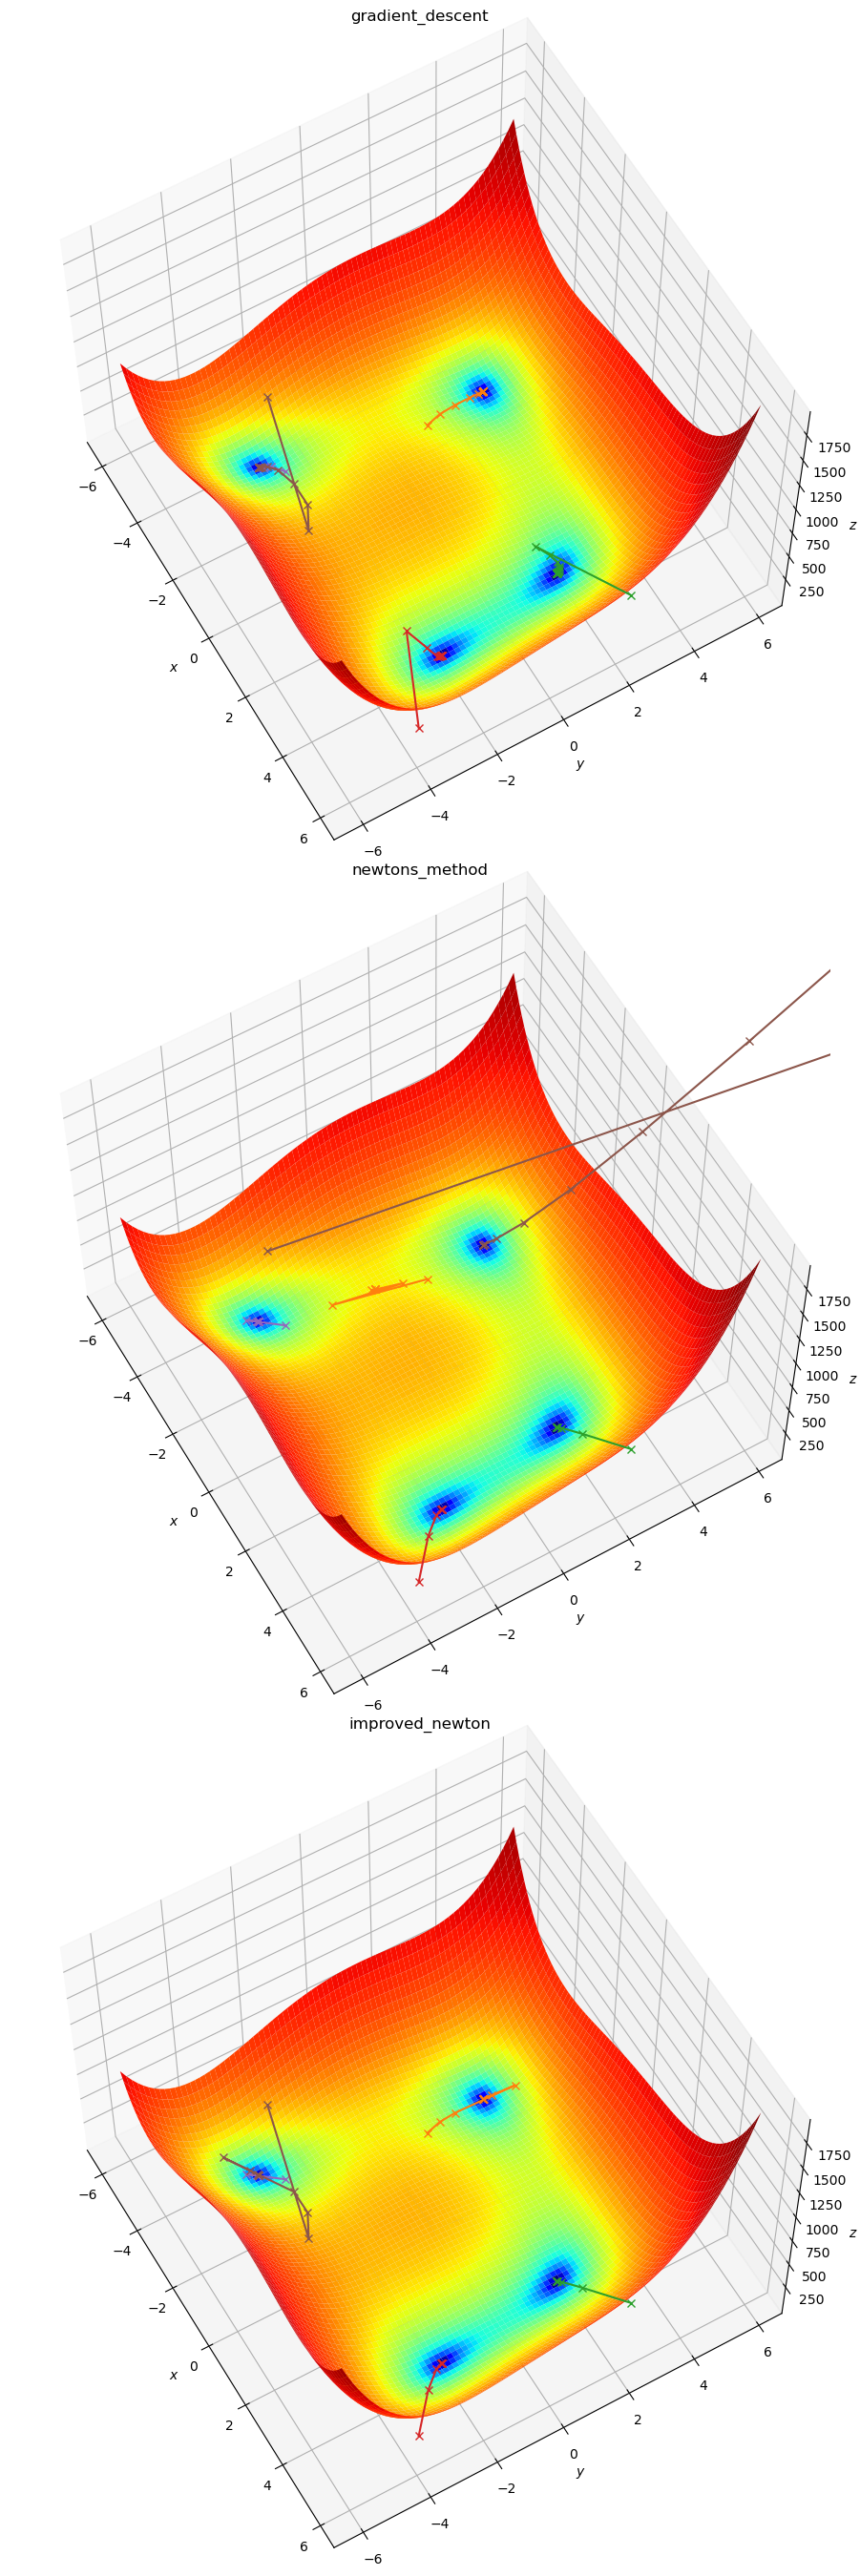

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

def make_himmelblau_plot(ax, x, y):
    ax.view_init(elev=60, azim=-30)
    ax.plot_surface(x, y, himmelblau([x,y]), cstride=1, rstride=1, norm=colors.LogNorm(), cmap=plt.cm.jet)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')

x = np.arange(-6, 6, 0.15)
y = np.arange(-6, 6, 0.15)
x, y = np.meshgrid(x, y)

# Please don't change the start point generation for your submission
retries = 5
rng = np.random.default_rng(654321)
x_0 = rng.uniform(-6, 6, size=(retries, 2))

methods = [gradient_descent, newtons_method, improved_newton]

fig, axes = plt.subplots(len(methods), 1, figsize=(12, 27), subplot_kw=dict(projection='3d'))
for ax, method in zip(axes, methods):
    ax.set_title(method.__name__)
    make_himmelblau_plot(ax, x, y)
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    z_min, z_max = ax.get_zlim()
    
    for t in range(retries):
        trace = method(himmelblau, himmelblau_gradient, himmelblau_hessian, x_0[t])
        ax.plot([x[0] for x in trace],[x[1] for x in trace], marker = "x", zorder = 3)
        print("Number of iterations: ", method.__name__, len(trace))
        
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_zlim(z_min, z_max)

fig.tight_layout()
plt.show()
plt.close(fig)

## 2. SVM Implementation
It is finally time to get your hands dirty and implement the SVM yourselves! Just for your convenience, here is the unconstrained optimization problem for the linear SVM that we want to train on the dataset $D = \{(\mathbf{x}^{(1)}, y^{(1)}), (\mathbf{x}^{(2)}, y^{(2)}), \ldots, (\mathbf{x}^{(n)}, y^{(n)})\}$:
\begin{equation*}
    \min_{\mathbf{w} \in \mathbb{R}^d, b \in \mathbb{R}} \frac{1}{2} \lVert \mathbf{w} \rVert^2 + \frac{C}{n} \sum_{i=1}^{n} \max\left(0, 1 - y^{(i)}(\mathbf{w}^T\mathbf{x}^{(i)} + b)\right)
\end{equation*}

1. Implement the support vector machine using (non-stochastic) gradient descent. Use the general gradient descent function that you have already written in exercise 1 of this sheet. The implementation should also include a flag that determines if a bias parameter $b$ should be learned during training or not. Choose $\mathbf{w}^{(0)} = \mathbf{0}$ and $b^{(0)} = 0$.
2. Now implement the SVM via stochastic gradient descent as well, i.e., sample a random batch of a given size from the training data for each gradient computation. Using your results from the previous part, this should only require you to change the wrapper function for computing the gradient.
3. Train both implementations on the simple two-dimensional toy dataset. Don't allow the SVM to learn a bias, i.e., $b$ should be zero.
4. Visualize the SVMs decision boundary and the optimization trajectory using the given code skeleton. This is also a good chance to see if your implementation works properly.
5. Produce a plot like in part 4 for both methods using the following parameter values: `C=1, step_size=0.1, batch_size=10, max_iter=1000`. Also print the value of $\mathbf{w}$ after training.
6. (OPTIONAL) Play around with parameters like step size, batch size, etc., and observe what changes.

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.24788854e-02  1.14726156e-02 -1.00000000e-04]
 [ 2.48329819e-02  2.28305051e-02 -2.00000000e-04]
 ...
 [ 4.05068179e-01  4.11778788e-01 -1.52500000e-02]
 [ 4.05135153e-01  4.11839789e-01 -1.53000000e-02]
 [ 4.05166776e-01  4.11814736e-01 -1.53000000e-02]]
Final w:  [0.40516678 0.41181474]
Final b:  -0.015299999999999906
[[ 0.          0.          0.        ]
 [ 0.00914241  0.01050441 -0.002     ]
 [ 0.02156753  0.02497842 -0.004     ]
 ...
 [ 0.39510809  0.42030949 -0.036     ]
 [ 0.39379287  0.42272961 -0.036     ]
 [ 0.39812946  0.41941189 -0.038     ]]
Final w:  [0.39812946 0.41941189]
Final b:  -0.037999999999999964


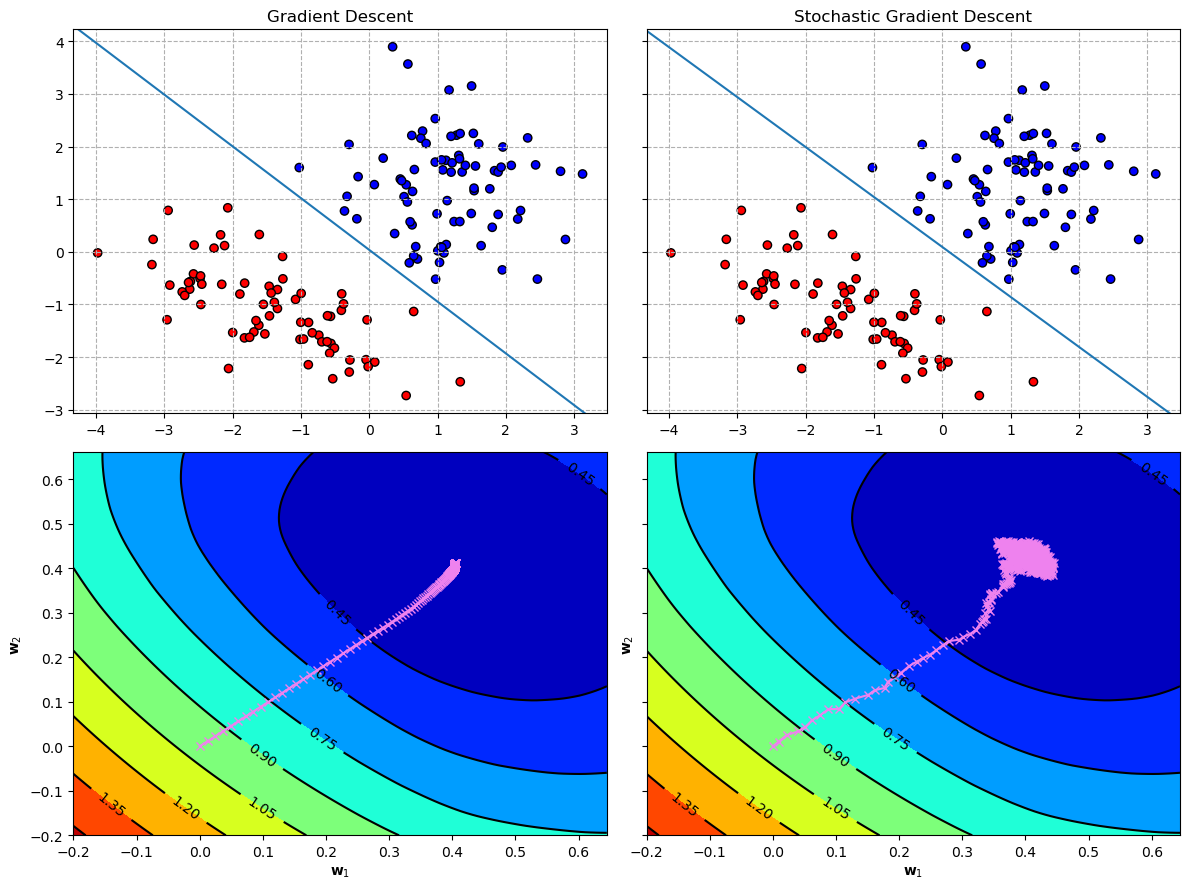

In [92]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification


def hinge_loss(t):
    return np.maximum(0, 1 - t)

def hinge_gradient(t):
    return np.where(t<1, -1, 0)

def svm_loss(w, b, C, x, y):
    return 0.5*np.sum(w**2, axis=0) + C/x.shape[0] * np.sum(hinge_loss(y*(np.matmul(x, w) + b)), axis=0)

def svm_gradient(w, b, C, x, y):
    margin = y * (x @ w + b)  # Shape: (n,)
    indicator = (margin < 1).astype(float)  # 1 für verletzte Punkte

    # Gradient für w
    w_grad = w - C / x.shape[0] * np.sum((indicator * y)[:, np.newaxis] * x, axis=0)

    # Gradient für b
    b_grad = - C / x.shape[0] * np.sum(indicator * y)

    return np.hstack([w_grad, b_grad])

def svm_gradient_batch(w, b, C, x, y, batch_size):
    idx = np.random.choice(X.shape[0], size = batch_size, replace=False)
    x = x[idx]
    y = y[idx]
    margin = y * (x @ w + b)  # Shape: (n,)
    indicator = (margin < 1).astype(float)  # 1 für verletzte Punkte

    # Gradient für w
    w_grad = w - C / batch_size * np.sum((indicator * y)[:, np.newaxis] * x, axis=0)

    # Gradient für b
    b_grad = - C / batch_size * np.sum(indicator * y)

    return np.hstack([w_grad, b_grad])

class SVM_GD(BaseEstimator, ClassifierMixin):
    def __init__(self, bias=True, C=1, step_size=0.01, max_iter=1000):
        super(SVM_GD, self).__init__()
        
        self.bias = bias
        self.C = C
        self.step_size = step_size
        self.max_iter = max_iter
        self.w = None
        self.b = None

    def fit(self, X, y):
        
        if self.bias:
            f = lambda x: svm_loss(x[:-1], x[-1], self.C, X, y)
            f_grad = lambda x: svm_gradient(x[:-1], x[-1], self.C, X, y)
        else:
            f = lambda x: svm_loss(x[:-1], 0, self.C, X, y)
            f_grad = lambda x: svm_gradient(x[:-1], 0, self.C, X, y)

        start_solution = np.zeros(X.shape[1]+1)
        
        trace = gradient_descent(f, f_grad, None, start_solution, step_size=self.step_size, max_iter=self.max_iter)
        trace = np.array(trace)
        self.w = trace[-1, :-1]
        self.b = trace[-1, -1] if self.bias else 0

        return trace

    def predict(self, X):
        if self.w is None or self.b is None:
            raise ValueError('Predict can only be called after supplying training data with fit first!')
        return np.sign(np.matmul(X, self.w) + self.b)
    
class SVM_SGD(SVM_GD):
    def __init__(self, bias=True, batch_size=32, C=1, step_size=0.01, max_iter=1000):
        super(SVM_SGD, self).__init__(bias, C, step_size, max_iter)
        
        self.batch_size = batch_size
    
    def fit(self, X, y):
        idx = np.random.choice(X.shape[0], size=self.batch_size, replace=False)
        if self.bias:
            f = lambda x: svm_loss(x[:-1], x[-1], self.C, X, y)
            f_grad = lambda x: svm_gradient_batch(x[:-1], x[-1], self.C, X, y, self.batch_size)
        else:
            f = lambda x: svm_loss(x[:-1], 0, self.C, X, y)
            f_grad = lambda x: svm_gradient_batch(x[:-1], 0, self.C, X, y, self.batch_size)

        start_solution = np.zeros(X.shape[1]+1)
        

        trace = gradient_descent(f, f_grad, None, start_solution, step_size=self.step_size, max_iter=self.max_iter)
        trace = np.array(trace)
        self.w = trace[-1, :-1]
        self.b = trace[-1, -1] if self.bias else 0
        return trace



# Generate toy data
# Please don't change the data generation seeds or methods for your submission
n = 200
X, Y = make_classification(n, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, class_sep=1.2, random_state=12345)
# Change labels from 0,1 to -1,1
Y *= 2; Y -= 1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=12345)

svm_gd = SVM_GD(bias=True, step_size=0.01)
svm_sgd = SVM_SGD(bias=True, batch_size=5, step_size=0.01)
classifiers = [(svm_gd, 'Gradient Descent'), (svm_sgd, 'Stochastic Gradient Descent')]

cmap = colors.ListedColormap([[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]])
fig, axes = plt.subplots(2, 2, figsize=(12, 9), sharex='row', sharey='row')

traces = []

def apply_line(x, w, b):
    a = -w[0]/w[1]
    b = -b/w[1]
    return a*x+b

for (clf, name), ax in zip(classifiers, axes[0]):
    ax.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap, edgecolor='k')
    ax.grid(linestyle='dashed')
    x_min, x_max = ax.get_xlim()
    y_min, y_max = ax.get_ylim()
    
    trace = clf.fit(X,Y)
    print(trace)
    traces.append(trace)

    print("Final w: ", clf.w)
    print("Final b: ", clf.b)
    x_line = np.array([x_min, x_max])
    ax.plot(x_line, apply_line(x_line, clf.w, clf.b))

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(f'{name}')


res = 100
all_weights = np.vstack([trace[:, :2] for trace in traces])
w_min = np.min(all_weights, axis=0)
w_max = np.max(all_weights, axis=0)
w_1 = np.linspace(w_min[0]-0.2, w_max[0]+0.2, res)
w_2 = np.linspace(w_min[1]-0.2, w_max[1]+0.2, res)
w_1, w_2 = np.meshgrid(w_1, w_2)
for clf, trace, ax in zip([svm_gd, svm_sgd], traces, axes[1]):
    loss = svm_loss(np.stack([w_1.ravel(), w_2.ravel()], axis=0), 0, clf.C, X_train, Y_train.reshape(-1, 1))
    ax.contourf(w_1, w_2, loss.reshape(w_1.shape), levels=10, cmap=plt.cm.jet)
    cont = ax.contour(w_1, w_2, loss.reshape(w_1.shape), levels=10, colors='black')
    ax.clabel(cont, inline=1)
    ax.plot(trace[:,0], trace[:,1], marker='x', c='violet')
    ax.set_xlabel('$\mathbf{w}_1$')
    ax.set_ylabel('$\mathbf{w}_2$')
    
fig.tight_layout()
plt.show()
plt.close(fig)